# Running CherryML on Respiratory Complex I

In [3]:
import os
os.chdir("/Users/jack/classes/ccb293/final_project/cherryproj/CherryML")
proj_dir = "../data"

## LG Model

In [2]:
# LG model (this does not require the contacts matrix, but gives the same error)
proj_dir = "../data"

!(python -m cherryml \
    --output_path $proj_dir/learned_rate_matrix_complexI.txt \
    --model_name LG \
    --msa_dir $proj_dir/msa_ETC_fasta_files \
    --cache_dir $proj_dir/cache \
    --num_processes_tree_estimation 5)

[2024-12-03 17:28:19,349] - cherryml.caching - INFO - Setting cache to use hash length: 64
[2024-12-03 17:28:19,349] - cherryml.caching - INFO - Setting cache to use 0 directory levels.
[2024-12-03 17:28:19,349] - cherryml.caching - INFO - Setting cache directory to: ../data/cache
/Users/jack/classes/ccb293/final_project/cherryproj/CherryML/cherryml/io/_rate_matrix.py:58: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  res = pd.read_csv(


### Data Analysis

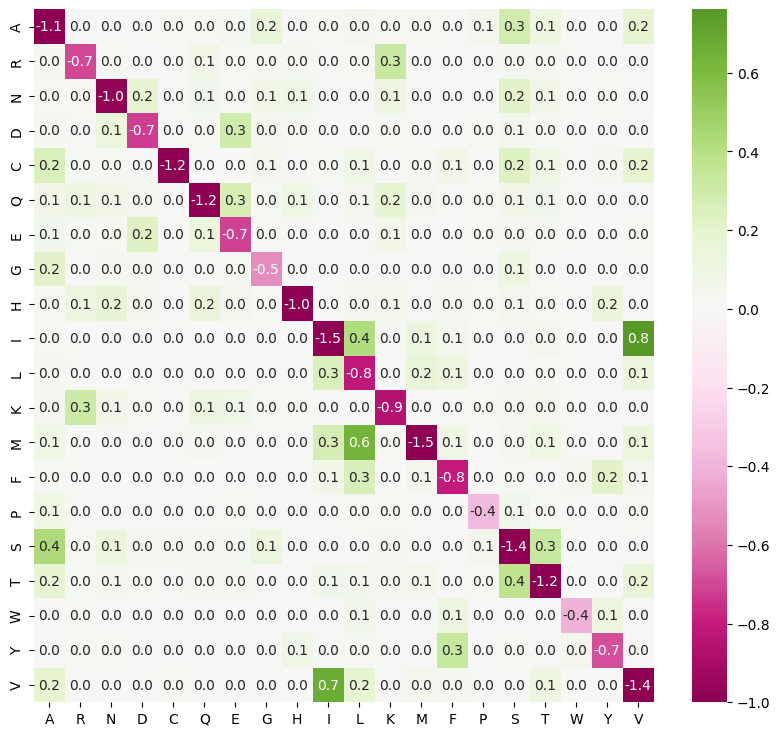

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(f"{proj_dir}/learned_rate_matrix_complexI.txt", sep="\t", index_col=0)
# Q = df.copy().values
# df[df < 0] = np.nan
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(df, center=0, cmap="PiYG", vmin=-1, annot=True, fmt=".1f", ax=ax)
fig.savefig("../figures/overall_rate_matrix.png", dpi=300)
plt.show()

In [11]:
df.values.max()

np.float64(0.7614762)

## Run on Membrane / other subunits separately

In [112]:
families = []

for i in os.listdir("/Users/jack/classes/ccb293/final_project/cherryproj/data/msa_ETC_fasta_files"):
    fam = i.split(".")[0]
    # print(fam)
    families.append(fam)

In [113]:
sdf = pd.read_csv("../complexI_subunits.csv")
sdf.loc[:, 'pfam'] = sdf['pfam'].str.replace(r'\xa0', '', regex=True)
core_subunits = sdf[(sdf["Type"] == "Core")]
membrane_subunits = core_subunits[core_subunits["membrane"]]
non_membrane_subunits = core_subunits[core_subunits["membrane"] == False]
membrane_subunits

,#,Human/Bovine subunit,Human protein,Protein description (UniProt),pfam,Type,Chain,Auth Name,membrane
7,8,ND1 / NU1M,NU1M_HUMAN,NADH-ubiquinone oxidoreductase chain 1 EC 1.6.5.3,PF00146,Core,PA,s,True
8,9,ND2 / NU2M,NU2M_HUMAN,NADH-ubiquinone oxidoreductase chain 2 EC 1.6.5.3,PF00361;PF06444,Core,GA,i,True
9,10,ND3 / NU3M,NU3M_HUMAN,NADH-ubiquinone oxidoreductase chain 3 EC 1.6.5.3,PF00507,Core,HA,j,True
10,11,ND4 / NU4M,NU4M_HUMAN,NADH-ubiquinone oxidoreductase chain 4 EC 1.6.5.3,PF01059;PF00361,Core,OA,r,True
11,12,ND4L / NULM,NU4LM_HUMAN,NADH-ubiquinone oxidoreductase chain 4L EC 1.6...,PF00420,Core,IA,k,True
12,13,ND5 / NU5M,NU5M_HUMAN,NADH-ubiquinone oxidoreductase chain 5 EC 1.6.5.3,PF00361;PF06455;PF00662,Core,JA,l,True
13,14,ND6 / NU6M,NU6M_HUMAN,NADH-ubiquinone oxidoreductase chain 6 EC 1.6.5.3,PF00499,Core,KA,m,True


In [120]:
membrane_pfams, non_membrane_pfams = set(), set()

for _, row in membrane_subunits.iterrows():
    subunit_families = row['pfam'].split(";")
    subunit_families = [i for i in subunit_families if i in families]
    membrane_pfams.update(subunit_families)
    print(row["Auth Name"], subunit_families)

for _, row in non_membrane_subunits.iterrows():
    subunit_families = row['pfam'].split(";")
    subunit_families = [i for i in subunit_families if i in families]
    non_membrane_pfams.update(subunit_families)
    print(row["Auth Name"], subunit_families)

s ['PF00146']
i ['PF00361']
j ['PF00507']
r ['PF01059', 'PF00361']
k ['PF00420']
l ['PF00361', 'PF06455']
m ['PF00499']
C ['PF01058']
B ['PF12838']
O ['PF01257']
P ['PF00329']
Q ['PF00346']
A ['PF01512']
M ['PF00384']


In [ ]:
import shutil

os.makedirs(f"{proj_dir}/msa_ETC_fasta_files_membrane", exist_ok=True)
os.makedirs(f"{proj_dir}/msa_ETC_fasta_files_non_membrane", exist_ok=True)

for fam in membrane_pfams:
    shutil.copyfile(
        f"{proj_dir}/msa_ETC_fasta_files/{fam}.txt",
        f"{proj_dir}/msa_ETC_fasta_files_membrane/{fam}.txt",
        )
    
for fam in non_membrane_pfams:
    shutil.copyfile(
        f"{proj_dir}/msa_ETC_fasta_files/{fam}.txt",
        f"{proj_dir}/msa_ETC_fasta_files_non_membrane/{fam}.txt",
        )

### CherryML on Membrane

In [124]:
!(python -m cherryml \
    --output_path $proj_dir/learned_rate_matrix_complexI_membrane.txt \
    --model_name LG \
    --msa_dir $proj_dir/msa_ETC_fasta_files_membrane \
    --cache_dir $proj_dir/cache \
    --num_processes_tree_estimation 5)

[2024-12-03 21:20:34,384] - cherryml.caching - INFO - Setting cache to use hash length: 64
[2024-12-03 21:20:34,384] - cherryml.caching - INFO - Setting cache to use 0 directory levels.
[2024-12-03 21:20:34,385] - cherryml.caching - INFO - Setting cache directory to: ../data/cache
[2024-12-03 21:20:34,404] - cherryml.phylogeny_estimation._fast_tree - INFO - Going to run on 7 families using 5 processes
  0%|                                                     | 0/5 [00:00<?, ?it/s][2024-12-03 21:20:36,276] - cherryml.caching - INFO - Setting cache to use hash length: 64
[2024-12-03 21:20:36,277] - cherryml.caching - INFO - Setting cache to use 0 directory levels.
/Users/jack/classes/ccb293/final_project/cherryproj/CherryML/cherryml/io/_rate_matrix.py:58: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  res = pd.read_csv(
[2024-12-03 21:20:36,343] - cherryml.caching - INFO - Setting cache to us

### CherryML on non-membrane

In [125]:
!(python -m cherryml \
    --output_path $proj_dir/learned_rate_matrix_complexI_non_membrane.txt \
    --model_name LG \
    --msa_dir $proj_dir/msa_ETC_fasta_files_non_membrane \
    --cache_dir $proj_dir/cache \
    --num_processes_tree_estimation 5)

[2024-12-03 21:21:03,621] - cherryml.caching - INFO - Setting cache to use hash length: 64
[2024-12-03 21:21:03,621] - cherryml.caching - INFO - Setting cache to use 0 directory levels.
[2024-12-03 21:21:03,622] - cherryml.caching - INFO - Setting cache directory to: ../data/cache
[2024-12-03 21:21:03,638] - cherryml.phylogeny_estimation._fast_tree - INFO - Going to run on 7 families using 5 processes
  0%|                                                     | 0/5 [00:00<?, ?it/s][2024-12-03 21:21:05,819] - cherryml.caching - INFO - Setting cache to use hash length: 64
[2024-12-03 21:21:05,819] - cherryml.caching - INFO - Setting cache to use 0 directory levels.
/Users/jack/classes/ccb293/final_project/cherryproj/CherryML/cherryml/io/_rate_matrix.py:58: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  res = pd.read_csv(
[2024-12-03 21:21:05,833] - cherryml.caching - INFO - Setting cache to us

## Comparison

In [22]:
res_mem = pd.read_csv(f"{proj_dir}/learned_rate_matrix_complexI_membrane.txt", sep="\t", index_col=0)
res_nonmem = pd.read_csv(f"{proj_dir}/learned_rate_matrix_complexI_non_membrane.txt", sep="\t", index_col=0)

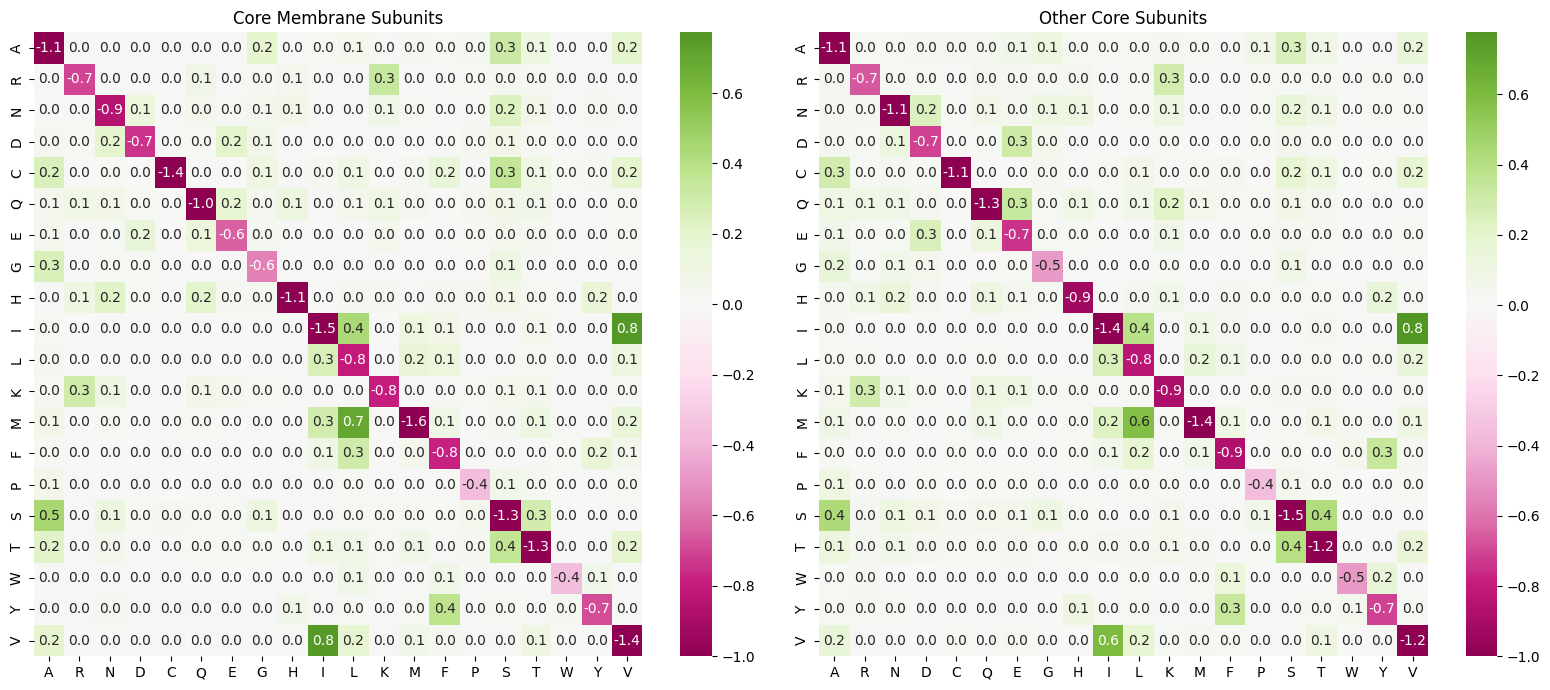

In [40]:
def heatmap(df, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    # df[df < 0] = np.nan
    sns.heatmap(df, center=0, cmap="PiYG", vmin=-1, annot=True, fmt=".1f", ax=ax)
    return ax

fig, axs = plt.subplots(1, 2, figsize=(16, 7))
heatmap(res_mem, ax=axs[0])
axs[0].set_title("Core Membrane Subunits")
heatmap(res_nonmem, ax=axs[1])
axs[1].set_title("Other Core Subunits")
fig.tight_layout()
fig.savefig("../figures/membrane_non_membrane_core_Q.png", dpi=300)
plt.show()

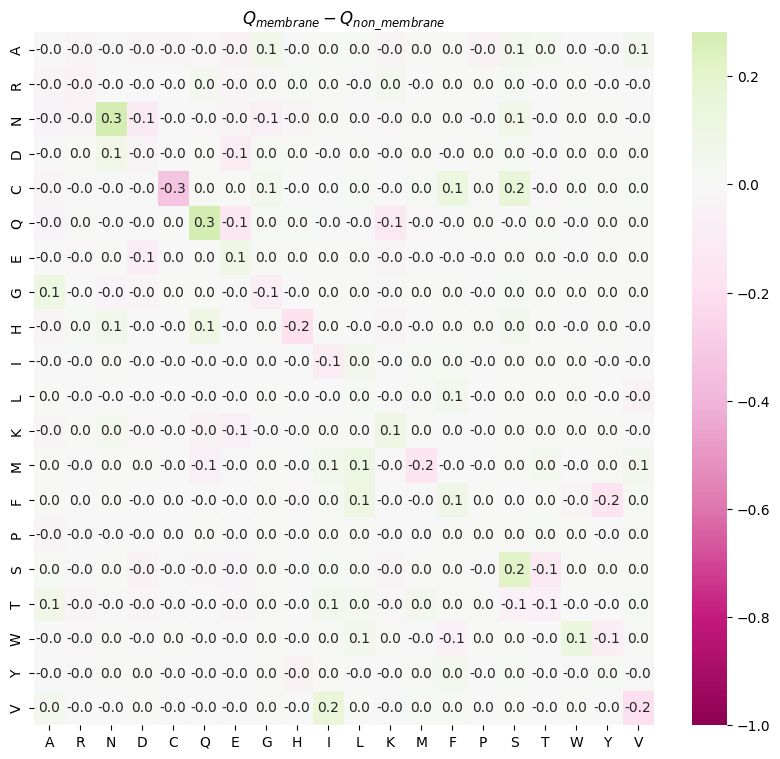

In [39]:
res_diff = res_mem - res_nonmem
fig, ax = plt.subplots(figsize=(10, 9))
heatmap(res_diff, ax=ax)
ax.set_title(r"$Q_{membrane} - Q_{non\_membrane}$")
fig.savefig("../figures/core_membrane_vs_other_deltaQ.png", dpi=300)
plt.show()